In [ ]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

지역적 선형 임베딩(Locally Linear Embedding, LLE)  
각 데이터 포인트의 이웃 데이터 중 k개 이웃 데이터를 선정하고 데이터 자신과 k개의 이웃 데이터를 하나의 덩어리로 가정하고 데이터를 재구성한다. 기존 데이터 자신의 이웃 데이터를 기준으로 재구성하는 방법으로 해당 데이터 자체보다 주변의 이웃 데이터 들이 중요한다.

In [1]:
# 데이터 불러오기
from sklearn import datasets # 와인 데이터를 사용하기 위해 import 한다.
raw_wine = datasets.load_wine() # 와인 데이터를 불러온다.

In [2]:
# 피쳐/타겟 데이터 지정
X = raw_wine.data # 와인 피쳐 데이터를 저장한다.
y = raw_wine.target # 와인 타겟 데이터를 저장한다.

In [3]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, X_te.shape)

(133, 13) (45, 13)


In [4]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해 import 한다.
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
X_tn_std = std_scale.fit_transform(X_tn) # 트레이닝 피쳐 데이터 X_tn을 표준화 한다.
X_te_std = std_scale.transform(X_te) # 테스트 피쳐 데이터 X_te를 표준화 한다.

In [11]:
# LLE를 통한 차원 축소 
from sklearn.manifold import LocallyLinearEmbedding #LLE 알고리즘을 사용하기 위해 import 한다. 
lle = LocallyLinearEmbedding(n_components=2) # LLE 모델을 만든다. 
lle.fit(X_tn_std, y_tn)
X_tn_lle = lle.transform(X_tn_std)
X_te_lle = lle.transform(X_te_std)

In [12]:
# 차원 축소 확인
print(X_tn_std.shape, X_te_std.shape, X_te_std.shape, X_te_lle.shape)

(133, 13) (45, 13) (45, 13) (45, 2)


In [13]:
# LLE 임베딩 벡터 확인
print(lle.embedding_)

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

차원 축소된 데이터 시각화 

In [14]:
import matplotlib.pyplot as plt
import pandas as pd # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.
lle_columns = ['lle_comp1', 'lle_comp2'] # 차원 축소된 데이터의 열 이름을 정한다.
X_tn_lle_df = pd.DataFrame(X_tn_lle, columns=lle_columns) # 차원 축소된 데이터를 데이터프레임으로 만든다.
X_tn_lle_df['target'] = y_tn # 차원 축소된 데이터로 만든 데이터프레임에 타겟 데이터를 결합한다.
X_tn_lle_df

,lle_comp1,lle_comp2,target
0,0.103667,0.037909,0
1,0.072231,0.007653,1
2,0.112879,0.059241,0
3,0.115604,0.062051,0
4,0.118543,0.067187,0
...,...,...,...
128,-0.122454,0.117555,2
129,-0.106749,0.077420,2
130,0.001496,-0.119325,1
131,-0.111976,0.091433,2


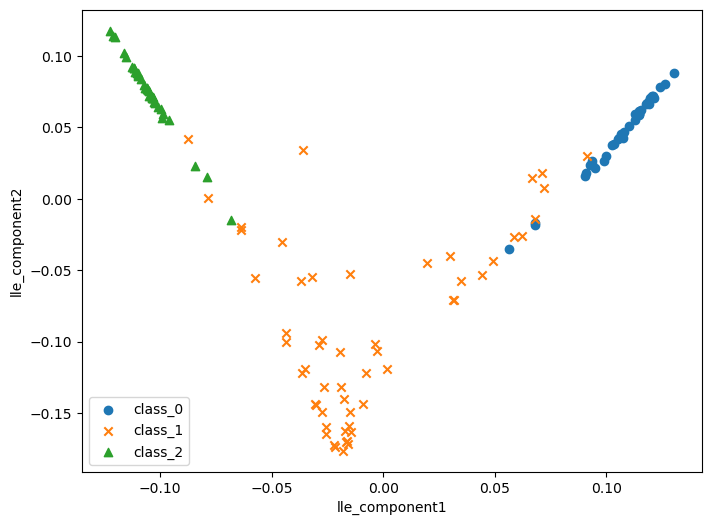

In [17]:
plt.figure(figsize=[8, 6])
df = X_tn_lle_df
markers = ['o', 'x', '^']
# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index] # 시각화할 와인 데이터를 얻어온다.
    target_index = raw_wine.target_names[index] # 시각화할 와인의 타겟 이름을 얻어온다.
    X1 = df_index['lle_comp1'] # 시각화할 차원 축소된 데이터의 첫 번째 주성분 벡터를 얻어온다.
    X2 = df_index['lle_comp2'] # 시각화할 차원 축소된 데이터의 두 번째 주성분 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index) # 산포도를 그린다.
# =====

plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_tn_std, y_tn)
pred_rf = clf_rf.predict(X_te_std)
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf_lle = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_lle.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf_lle.predict(X_te_lle)
accuracy = accuracy_score(y_te, pred_rf_lle)
print(accuracy)

0.9333333333333333
